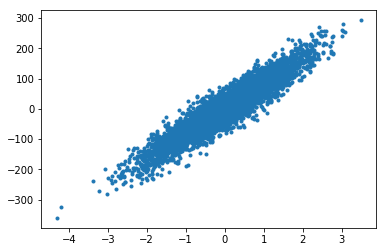

In [29]:
import numpy as np  
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 

samples = 10000
features = 1

X, y = make_regression(n_samples=samples, n_features=features, n_informative=5, n_targets=1, bias=0.0, effective_rank=None, tail_strength=0.5, noise=30, shuffle=True, coef=False, random_state=1345)

featuresDF = pd.DataFrame(X, columns=list('a'))
valuesDF = pd.DataFrame({'labels': y})

features = featuresDF[:5000]['a']
values   = valuesDF[:5000]['labels']

features2 = featuresDF[5000:]['a']
values2   = valuesDF[5000:]['labels']

#dataset = features.join(values)

dataset.head(5)
plt.scatter(features, values, marker='.')  
plt.show() 

In [14]:
from sklearn.model_selection import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, values, test_size=0.2, random_state=546544)
print "Training and testing split was successful."

Training and testing split was successful.


In [15]:
# Performance metrics
from sklearn.metrics import fbeta_score, make_scorer
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    import sklearn.metrics as metrics
    score = metrics.r2_score(y_true, y_predict)
    # Return the score
    return score

### Fitting the model

In [48]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.1, train_size=0.1, random_state=None)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1, 100)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc =  make_scorer(performance_metric)
    

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator = regressor, param_grid= params, scoring = scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [49]:

# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Optimal parameters {}.".format(reg.get_params())

Optimal parameters {'presort': False, 'splitter': 'best', 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'criterion': 'mse', 'random_state': None, 'min_impurity_split': None, 'max_features': None, 'max_depth': 4}.


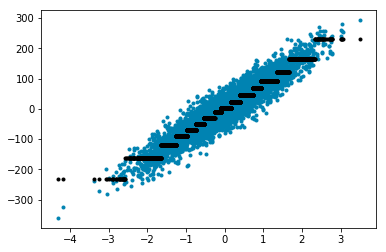

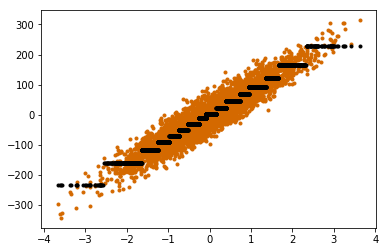

R2 Score 0.873571066444 
R2 Score 0.872964405062 


In [43]:
# Produce a matrix for client data
from sklearn.metrics import r2_score

def predictDataset(regressor, df):
    y = np.array([])
    for x in np.nditer(df):
        y = np.append(y, regressor.predict(x))
    return pd.DataFrame({'y': y})

dfPredictions  = predictDataset(reg, features)
dfPredictions2 = predictDataset(reg, features2)
 
fig, ax = plt.subplots()
#Trained Data
ax.scatter(features, values, color='#0083B2', marker='.') 
ax.scatter(features ,dfPredictions['y'], color='#000000', marker='.')

dfPredictions2[['y']].head()
#New Data
fig2, ax2 = plt.subplots()
ax2.scatter(features2, values2, color='#D46900', marker='.')  
ax2.scatter(features2, dfPredictions2['y'], color='#000000', marker='.')

plt.show() 


print "R2 Score {} ".format(r2_score(values, dfPredictions))
print "R2 Score {} ".format(r2_score(values2, dfPredictions2))